Простые НС и метод обратного распространения ошибки

Обучить НС на датасете MNIST.

Критерии оценки: 1. Точность классификации 

In [2]:
import numpy as np
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras import optimizers
from keras import initializers

Using TensorFlow backend.


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # загружаем MNIST

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Видим, что данные из матрицы 28х28 представленны в виде вектора 784 и уже отнормированы от 0 до 1

In [5]:
mnist.train.images.shape, mnist.test.images.shape # размер выборок

((55000, 784), (10000, 784))

Создадим простую модель с одним скрытым слоем

In [6]:
def get_h1_model(neurons_h1=100,optimizer='adam'):
    inp = Input(shape=(784,)) # Входной вектор равен 784
    hidden_1 = Dense(neurons_h1, activation='relu', kernel_initializer=initializers.he_uniform(seed=None) )(inp) # скрытый полносвязанный слой
    out = Dense(10, activation='softmax')(hidden_1) # Выходной softmax слой

    model = Model(input=inp, output=out) # создаем модель
    model.compile(loss='categorical_crossentropy', # cross-entropy loss function
              optimizer=optimizer, # optimiser
              metrics=['accuracy']) # accuracy
    return model

In [7]:
# используем оптимизатор Adam с параметрами по умолчанию
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model = get_h1_model(optimizer=opt)

/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [8]:
batch_size = 100
num_epochs = 20

In [9]:
history = model.fit(mnist.train.images, mnist.train.labels,
          batch_size=batch_size, nb_epoch=num_epochs,
          verbose=1, validation_split=0.1)

/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 49500 samples, validate on 5500 samples
Epoch 1/20
49500/49500 [==============================] - 10s 193us/step - loss: 0.3952 - acc: 0.8901 - val_loss: 0.1796 - val_acc: 0.9496
Epoch 2/20
49500/49500 [==============================] - 1s 19us/step - loss: 0.1885 - acc: 0.9470 - val_loss: 0.1296 - val_acc: 0.9636
Epoch 3/20
49500/49500 [==============================] - 1s 19us/step - loss: 0.1380 - acc: 0.9601 - val_loss: 0.1100 - val_acc: 0.9680
Epoch 4/20
49500/49500 [==============================] - 1s 19us/step - loss: 0.1078 - acc: 0.9687 - val_loss: 0.1081 - val_acc: 0.9676
Epoch 5/20
49500/49500 [==============================] - 1s 19us/step - loss: 0.0879 - acc: 0.9745 - val_loss: 0.0913 - val_acc: 0.9729
Epoch 6/20
49500/49500 [==============================] - 1s 20us/step - loss: 0.0729 - acc: 0.9791 - val_loss: 0.0830 - val_acc: 0.9753
Epoch 7/20
49500/49500 [==============================] - 1s 21us/step - loss: 0.0620 - acc: 0.9822 - val_loss: 0.0830 - val_ac

In [10]:
import matplotlib.pyplot as plt

def plot_loss(history):
    """
    строит график loss
    """
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def plot_accuracy(history):
    """
    строит график accuracy
    """
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

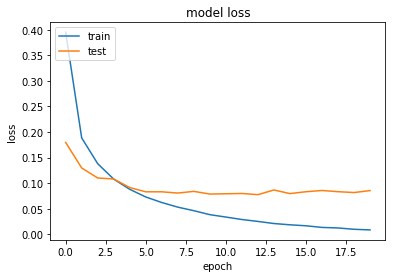

In [11]:
plot_loss(history)

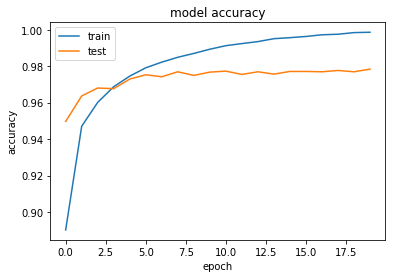

In [12]:
plot_accuracy(history)

Где-то после 5 эпохи модель начинает переобучаться

In [13]:
model.evaluate(mnist.test.images, mnist.test.labels, verbose=1)

10000/10000 [==============================] - 0s 19us/step


[0.08934848371841654, 0.9765]

In [14]:
# Создадим модель с 2 скрытыми слоями
def get_h2_model(neurons_h1=100,optimizer='adam'):
    inp = Input(shape=(784,)) 
    hidden_1 = Dense(neurons_h1, activation='relu', kernel_initializer=initializers.he_uniform(seed=None) )(inp) 
    hidden_2 = Dense(neurons_h1, activation='relu', kernel_initializer=initializers.he_uniform(seed=None) )(hidden_1)
    out = Dense(10, activation='softmax',init='glorot_uniform')(hidden_2) 
    
    model = Model(input=inp, output=out) 
    model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy']) 
    return model

In [15]:
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model = get_h2_model(optimizer=opt)

/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="glorot_uniform")`
  
/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [16]:
batch_size = 100
num_epochs = 20

In [17]:
history = model.fit(mnist.train.images, mnist.train.labels,
          batch_size=batch_size, nb_epoch=num_epochs,
          verbose=1, validation_split=0.1)

/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 49500 samples, validate on 5500 samples
Epoch 1/20
49500/49500 [==============================] - 1s 28us/step - loss: 0.3427 - acc: 0.9029 - val_loss: 0.1436 - val_acc: 0.9609
Epoch 2/20
49500/49500 [==============================] - 1s 23us/step - loss: 0.1399 - acc: 0.9583 - val_loss: 0.1100 - val_acc: 0.9655
Epoch 3/20
49500/49500 [==============================] - 1s 23us/step - loss: 0.0999 - acc: 0.9689 - val_loss: 0.0925 - val_acc: 0.9713
Epoch 4/20
49500/49500 [==============================] - 1s 22us/step - loss: 0.0751 - acc: 0.9773 - val_loss: 0.0984 - val_acc: 0.9707
Epoch 5/20
49500/49500 [==============================] - 1s 21us/step - loss: 0.0599 - acc: 0.9818 - val_loss: 0.0944 - val_acc: 0.9718
Epoch 6/20
49500/49500 [==============================] - 1s 22us/step - loss: 0.0485 - acc: 0.9848 - val_loss: 0.0738 - val_acc: 0.9785
Epoch 7/20
49500/49500 [==============================] - 1s 22us/step - loss: 0.0396 - acc: 0.9875 - val_loss: 0.0750 - val_acc:

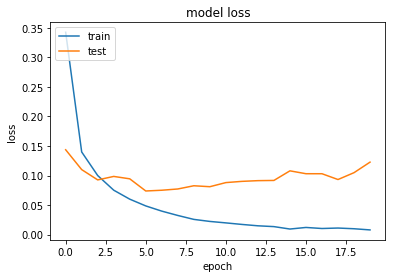

In [18]:
plot_loss(history)

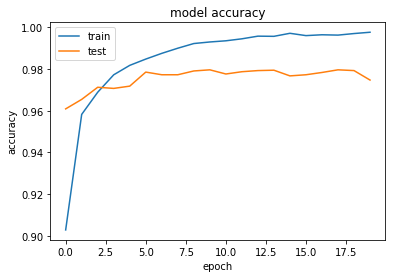

In [19]:
plot_accuracy(history)

Модель переобучается еще быстрее

In [20]:
model.evaluate(mnist.test.images, mnist.test.labels, verbose=1)

10000/10000 [==============================] - 0s 22us/step


[0.10730476105406068, 0.9765]

In [21]:
from keras.layers.normalization import BatchNormalization

# попробуем добавить батч нормализацию
def get_h2b_model(neurons_h1=100,optimizer='adam'):
    inp = Input(shape=(784,)) 
    
    inp_norm = BatchNormalization(axis=1)(inp) # нормализуем входной слой
    hidden_1 = Dense(neurons_h1, activation='relu', kernel_initializer=initializers.he_uniform(seed=None) )(inp_norm) 
    hidden_2 = Dense(neurons_h1, activation='relu', kernel_initializer=initializers.he_uniform(seed=None) )(hidden_1)
    h2_norm = BatchNormalization(axis=1)(hidden_2) # нормализуем выходной слой
    out = Dense(10, activation='softmax',init='glorot_uniform')(h2_norm) 

    model = Model(input=inp, output=out) 
    model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy']) 
    return model

In [22]:
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model = get_h2b_model(256, optimizer=opt)

/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="glorot_uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [23]:
batch_size = 100
num_epochs = 20

In [24]:
history = model.fit(mnist.train.images, mnist.train.labels, 
          batch_size=batch_size, nb_epoch=num_epochs,
          verbose=1, validation_split=0.1)

/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 49500 samples, validate on 5500 samples
Epoch 1/20
49500/49500 [==============================] - 2s 43us/step - loss: 0.2409 - acc: 0.9278 - val_loss: 0.1155 - val_acc: 0.9675
Epoch 2/20
49500/49500 [==============================] - 2s 35us/step - loss: 0.0873 - acc: 0.9734 - val_loss: 0.0923 - val_acc: 0.9744
Epoch 3/20
49500/49500 [==============================] - 2s 36us/step - loss: 0.0571 - acc: 0.9818 - val_loss: 0.0911 - val_acc: 0.9755
Epoch 4/20
49500/49500 [==============================] - 2s 35us/step - loss: 0.0412 - acc: 0.9867 - val_loss: 0.0908 - val_acc: 0.9758
Epoch 5/20
49500/49500 [==============================] - 2s 35us/step - loss: 0.0319 - acc: 0.9893 - val_loss: 0.0875 - val_acc: 0.9773
Epoch 6/20
49500/49500 [==============================] - 2s 35us/step - loss: 0.0253 - acc: 0.9918 - val_loss: 0.0864 - val_acc: 0.9784
Epoch 7/20
49500/49500 [==============================] - 2s 35us/step - loss: 0.0236 - acc: 0.9923 - val_loss: 0.0768 - val_acc:

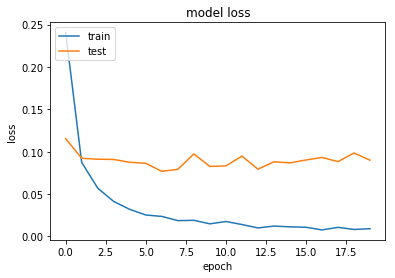

In [25]:
plot_loss(history)

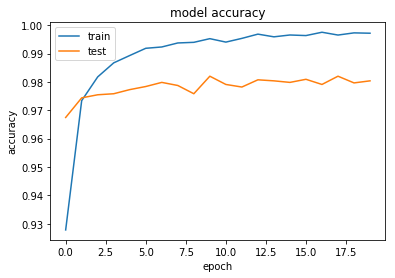

In [26]:
plot_accuracy(history)

Батч нормализация в чистом виде не сильно спасла от переобучения, возможно, мало слоев для её применения? 

In [27]:
model.evaluate(mnist.test.images, mnist.test.labels, verbose=1)

10000/10000 [==============================] - 0s 28us/step


[0.116985550515641, 0.978]

In [28]:
from keras.layers import Dropout

# Попробуем использовать дропаут
def get_h2d_model(neurons_h1=100,optimizer='adam'):
    inp = Input(shape=(784,)) 
    hidden_1 = Dense(neurons_h1, activation='relu', kernel_initializer=initializers.he_uniform(seed=None) )(inp)
    drop_1 = Dropout(0.25)(hidden_1) # дропаут 1 слоя
    hidden_2 = Dense(neurons_h1, activation='relu', kernel_initializer=initializers.he_uniform(seed=None) )(drop_1)
    drop_2 = Dropout(0.5)(hidden_2) # дропаут 2 слоя
    out = Dense(10, activation='softmax',init='glorot_uniform')(drop_2) 

    model = Model(input=inp, output=out) 
    model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy']) 
    return model

In [29]:
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model = get_h2d_model(256, optimizer=opt)

/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="glorot_uniform")`
  if __name__ == '__main__':
/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [30]:
batch_size = 100
num_epochs = 20

In [31]:
history = model.fit(mnist.train.images, mnist.train.labels, # Train the model using the training set...
          batch_size=batch_size, nb_epoch=num_epochs,
          verbose=1, validation_split=0.1)

/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 49500 samples, validate on 5500 samples
Epoch 1/20
49500/49500 [==============================] - 2s 33us/step - loss: 0.4176 - acc: 0.8709 - val_loss: 0.1131 - val_acc: 0.9669
Epoch 2/20
49500/49500 [==============================] - 1s 26us/step - loss: 0.1750 - acc: 0.9476 - val_loss: 0.0827 - val_acc: 0.9753
Epoch 3/20
49500/49500 [==============================] - 1s 26us/step - loss: 0.1318 - acc: 0.9603 - val_loss: 0.0783 - val_acc: 0.9764
Epoch 4/20
49500/49500 [==============================] - 1s 25us/step - loss: 0.1068 - acc: 0.9672 - val_loss: 0.0698 - val_acc: 0.9795
Epoch 5/20
49500/49500 [==============================] - 1s 26us/step - loss: 0.0870 - acc: 0.9732 - val_loss: 0.0718 - val_acc: 0.9804
Epoch 6/20
49500/49500 [==============================] - 1s 25us/step - loss: 0.0761 - acc: 0.9759 - val_loss: 0.0692 - val_acc: 0.9807
Epoch 7/20
49500/49500 [==============================] - 1s 26us/step - loss: 0.0685 - acc: 0.9788 - val_loss: 0.0653 - val_acc:

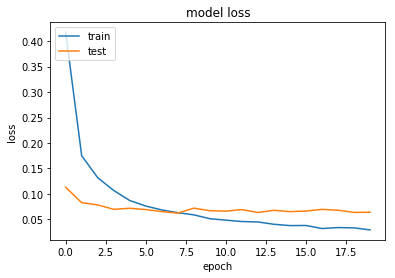

In [32]:
plot_loss(history)

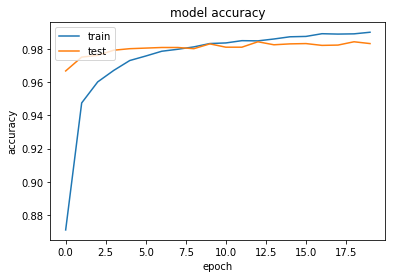

In [33]:
plot_accuracy(history)

Дропаут очень хорошо нормализовал, модель практически не переобучается

In [34]:
model.evaluate(mnist.test.images, mnist.test.labels, verbose=1)

10000/10000 [==============================] - 0s 23us/step


[0.07439991473800428, 0.9817]

In [35]:
# а если объединим дропаут и батч нормализации

def get_h2bd_model(neurons_h1=100,optimizer='adam'):
    inp = Input(shape=(784,)) # Входной вектор равен 784
    
    inp_norm = BatchNormalization(axis=1)(inp)
    hidden_1 = Dense(neurons_h1, activation='relu', kernel_initializer=initializers.he_uniform(seed=None) )(inp_norm) 
    drop_1 = Dropout(0.25)(hidden_1)
    hidden_2 = Dense(neurons_h1, activation='relu', kernel_initializer=initializers.he_uniform(seed=None) )(drop_1)
    h2_norm = BatchNormalization(axis=1)(hidden_2)
    drop_2 = Dropout(0.5)(h2_norm)
    out = Dense(10, activation='softmax',init='glorot_uniform')(drop_2)
    
    model = Model(input=inp, output=out) 
    model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy'])
    return model

/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':
/home/necromant/.virtualenvs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 49500 samples, validate on 5500 samples
Epoch 1/20
49500/49500 [==============================] - 2s 50us/step - loss: 0.4517 - acc: 0.8638 - val_loss: 0.1194 - val_acc: 0.9676
Epoch 2/20
49500/49500 [==============================] - 2s 38us/step - loss: 0.2059 - acc: 0.9370 - val_loss: 0.0984 - val_acc: 0.9725
Epoch 3/20
49500/49500 [==============================] - 2s 38us/step - loss: 0.1537 - acc: 0.9522 - val_loss: 0.0873 - val_acc: 0.9758
Epoch 4/20
49500/49500 [==============================] - 2s 37us/step - loss: 0.1234 - acc: 0.9621 - val_loss: 0.0828 - val_acc: 0.9780
Epoch 5/20
49500/49500 [==============================] - 2s 38us/step - loss: 0.1048 - acc: 0.9668 - val_loss: 0.0737 - val_acc: 0.9789
Epoch 6/20
49500/49500 [==============================] - 2s 37us/step - loss: 0.0906 - acc: 0.9705 - val_loss: 0.0793 - val_acc: 0.9791
Epoch 7/20
49500/49500 [==============================] - 2s 38us/step - loss: 0.0773 - acc: 0.9749 - val_loss: 0.0679 - val_acc:

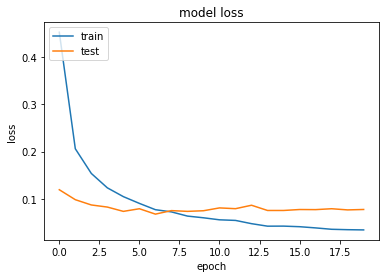

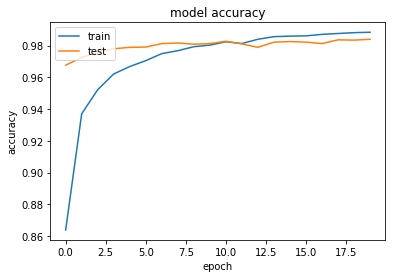

10000/10000 [==============================] - 0s 29us/step


[0.09889223741343976, 0.9785]

In [36]:
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model = get_h2bd_model(256, optimizer=opt)
batch_size = 100
num_epochs = 20
history = model.fit(mnist.train.images, mnist.train.labels, # Train the model using the training set...
          batch_size=batch_size, nb_epoch=num_epochs,
          verbose=1, validation_split=0.1)
plot_loss(history)
plot_accuracy(history)
model.evaluate(mnist.test.images, mnist.test.labels, verbose=1)

Объединение дропаута и батч нормализаций на простой моделе имеет почти такой же результат как и при чисто дропауте